<a href="https://colab.research.google.com/github/Djamel-DataScientist/Djamel-DataScientist/blob/main/Projet_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Modelistation Predictive des zonnes à potentielle d'investissement locative

In [ ]:
import numpy as np
import pandas as pd
import csv
import os
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
from folium.plugins import HeatMap
# Matplotlib syles 
"""
bmh
classic
dark_background
fast
fivethirtyeight
ggplot
grayscale
seaborn-bright
seaborn-colorblind
seaborn-dark-palette
seaborn-dark
seaborn-darkgrid
seaborn-deep
seaborn-muted
seaborn-notebook
seaborn-paper
seaborn-pastel
seaborn-poster
seaborn-talk
seaborn-ticks
seaborn-white
seaborn-whitegrid
seaborn
Solarize_Light2
tableau-colorblind10
_classic_test
"""

'\nbmh\nclassic\ndark_background\nfast\nfivethirtyeight\nggplot\ngrayscale\nseaborn-bright\nseaborn-colorblind\nseaborn-dark-palette\nseaborn-dark\nseaborn-darkgrid\nseaborn-deep\nseaborn-muted\nseaborn-notebook\nseaborn-paper\nseaborn-pastel\nseaborn-poster\nseaborn-talk\nseaborn-ticks\nseaborn-white\nseaborn-whitegrid\nseaborn\nSolarize_Light2\ntableau-colorblind10\n_classic_test\n'

In [ ]:
Racine_Data = "/content/drive/MyDrive/Machine_Learning_Project/"
calendar_path = Racine_Data + "calendar.csv"
listing_path = Racine_Data + "listings.csv"
valeurs_fonciere_2020 = Racine_Data + "valeursfoncieres-2020.txt"

In [ ]:
raw_listing = pd.read_csv(listing_path)
raw_calendar = pd.read_csv(calendar_path)

In [ ]:
print("Taille des données listing :")
print(raw_listing.shape)
print("Taille des données de calandrier :")
print(raw_calendar.shape)

Taille des données listing :
(65917, 74)
Taille des données de calandrier :
(24063315, 7)


In [ ]:
raw_listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [ ]:
raw_listing.head()

id  ... reviews_per_month
0  2577  ...              0.04
1  3109  ...              0.19
2  4890  ...              0.21
3  5396  ...              1.65
4  7397  ...              2.28

[5 rows x 74 columns]

In [ ]:
raw_calendar.head()

listing_id        date  ... minimum_nights maximum_nights
0       31893  2020-12-17  ...            6.0           15.0
1        2577  2020-12-16  ...            3.0         1125.0
2        2577  2020-12-17  ...            3.0         1125.0
3        2577  2020-12-18  ...            3.0         1125.0
4        2577  2020-12-19  ...            3.0         1125.0

[5 rows x 7 columns]

In [ ]:
raw_listing_cleaned = raw_listing
listing_paris = raw_listing_cleaned.loc[raw_listing_cleaned['host_location'] == "Paris, Île-de-France, France"]
subset_listinig = listing_paris[["id","host_neighbourhood","bedrooms","longitude","latitude"]]
subset_listinig.dropna(inplace=True)
subset_listinig.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


id            host_neighbourhood  bedrooms  longitude  latitude
2    4890                     Le Marais       1.0    2.35651  48.86409
4    7397                     Le Marais       2.0    2.35275  48.85758
5    7964  Gare du Nord - Gare de I'Est       1.0    2.34245  48.87417
7    9952                    République       1.0    2.37134  48.86227
12  11213                    République       1.0    2.37424  48.87110

In [ ]:
paris_airbnb_id = subset_listinig.id.tolist()
calandar_interesed_colums = ["listing_id","price"]
calendar_paris_selected_data = raw_calendar[calandar_interesed_colums]
calendar_paris_selected_data = calendar_paris_selected_data[calendar_paris_selected_data["listing_id"].isin(paris_airbnb_id)]
calendar_paris_selected_data["price"] = calendar_paris_selected_data["price"].str.replace('$','').str.replace(',','')
calendar_paris_selected_data.price = calendar_paris_selected_data.price.astype(float, errors = 'raise')
calendar_paris_selected_data.head()

listing_id  price
2385        4890   80.0
2386        4890   80.0
2387        4890   80.0
2388        4890   80.0
2389        4890   80.0

In [ ]:
calendar_paris_selected_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11437416 entries, 2385 to 24053459
Data columns (total 2 columns):
 #   Column      Dtype  
---  ------      -----  
 0   listing_id  int64  
 1   price       float64
dtypes: float64(1), int64(1)
memory usage: 261.8 MB


In [ ]:
print('NaN in the DataFrame :/n',calendar_paris_selected_data.isna().sum())
calendar_paris_selected_data = calendar_paris_selected_data.dropna()
print('NaN in the DataFrame after clean :/n',calendar_paris_selected_data.isna().sum())
print('DataFrame Shape :',calendar_paris_selected_data.shape)
calendar_paris_selected_data.head()

NaN in the DataFrame :/n listing_id       0
price         1825
dtype: int64
NaN in the DataFrame after clean :/n listing_id    0
price         0
dtype: int64
DataFrame Shape : (11435591, 2)


listing_id  price
2385        4890   80.0
2386        4890   80.0
2387        4890   80.0
2388        4890   80.0
2389        4890   80.0

In [ ]:
calendar_paris_selected_data.describe()

listing_id         price
count  1.143559e+07  1.143559e+07
mean   1.995952e+07  1.338101e+02
std    1.332585e+07  3.050603e+02
min    4.890000e+03  8.000000e+00
25%    7.432700e+06  6.500000e+01
50%    1.894548e+07  9.000000e+01
75%    3.231338e+07  1.350000e+02
max    4.699866e+07  1.449900e+04

In [ ]:
Number_Rating = calendar_paris_selected_data["listing_id"].value_counts().rename_axis('id').to_frame('Number_of_rentals').sort_values(by=['id'])
Number_Rating.describe()

Number_of_rentals
count       31325.000000
mean          365.062761
std             3.793812
min            17.000000
25%           365.000000
50%           365.000000
75%           365.000000
max           367.000000

In [ ]:
Number_Rating.head()

Number_of_rentals
id                      
4890                 365
7397                 365
7964                 365
9952                 365
11213                365

In [ ]:
calendar_paris_selected_data.rename(columns = {'listing_id':'id'}, inplace = True)
grouped_data = calendar_paris_selected_data.groupby(by=["id"], dropna=True).mean()
print(grouped_data.count())
print(listing_paris.count())
grouped_data.head()

price    31325
dtype: int64
id                                              47966
listing_url                                     47966
scrape_id                                       47966
last_scraped                                    47966
name                                            47915
                                                ...  
calculated_host_listings_count                  47966
calculated_host_listings_count_entire_homes     47966
calculated_host_listings_count_private_rooms    47966
calculated_host_listings_count_shared_rooms     47966
reviews_per_month                               38315
Length: 74, dtype: int64


price
id               
4890    80.000000
7397    86.720548
7964   130.000000
9952    75.756164
11213  157.000000

In [ ]:
subset_listinig.set_index("id", inplace=True)
subset_listinig.head()

host_neighbourhood  bedrooms  longitude  latitude
id                                                                
4890                      Le Marais       1.0    2.35651  48.86409
7397                      Le Marais       2.0    2.35275  48.85758
7964   Gare du Nord - Gare de I'Est       1.0    2.34245  48.87417
9952                     République       1.0    2.37134  48.86227
11213                    République       1.0    2.37424  48.87110

In [ ]:
map = folium.Map(location=[merged_airbnb_data.latitude.mean(), merged_airbnb_data.longitude.mean()], zoom_start=13, control_scale=True)
# convert to (n, 2) nd-array format for heatmap
paris_airbnb_concentration = subset_listinig[['latitude', 'longitude']].to_numpy() 

# plot heatmap
map.add_children(plugins.HeatMap(paris_airbnb_concentration, radius=16))
map

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  


In [ ]:
subset_listinig.dropna(inplace=True)
grouped_data.dropna(inplace=True)
print("Taille des données listing Paris:")
print(subset_listinig.shape)
print("Taille des données de calandrier Paris:")
print(grouped_data.shape)

Taille des données listing Paris:
(31325, 4)
Taille des données de calandrier Paris:
(31325, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
subset_listinig_merged_number_of_rented_time = subset_listinig.merge(Number_Rating, on="id")
subset_listinig_merged_number_of_rented_time.head()

host_neighbourhood  bedrooms  ...  latitude  Number_of_rentals
id                                             ...                             
4890                      Le Marais       1.0  ...  48.86409                365
7397                      Le Marais       2.0  ...  48.85758                365
7964   Gare du Nord - Gare de I'Est       1.0  ...  48.87417                365
9952                     République       1.0  ...  48.86227                365
11213                    République       1.0  ...  48.87110                365

[5 rows x 5 columns]

In [ ]:
merged_airbnb_data = subset_listinig_merged_number_of_rented_time.merge(grouped_data, on="id")
merged_airbnb_data.head()

host_neighbourhood  bedrooms  ...  Number_of_rentals       price
id                                             ...                               
4890                      Le Marais       1.0  ...                365   80.000000
7397                      Le Marais       2.0  ...                365   86.720548
7964   Gare du Nord - Gare de I'Est       1.0  ...                365  130.000000
9952                     République       1.0  ...                365   75.756164
11213                    République       1.0  ...                365  157.000000

[5 rows x 6 columns]

In [ ]:
merged_airbnb_data.to_csv("/content/drive/MyDrive/Machine_Learning_Project/merged_data.csv")
merged_airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31325 entries, 4890 to 46998661
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   host_neighbourhood  31325 non-null  object 
 1   bedrooms            31325 non-null  float64
 2   longitude           31325 non-null  float64
 3   latitude            31325 non-null  float64
 4   Number_of_rentals   31325 non-null  int64  
 5   price               31325 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.7+ MB


In [ ]:
merged_airbnb_data.Number_of_rentals = merged_airbnb_data.Number_of_rentals.astype(str, errors = 'raise')
merged_airbnb_data.head()

host_neighbourhood  bedrooms  ...  Number_of_rentals       price
id                                             ...                               
4890                      Le Marais       1.0  ...                365   80.000000
7397                      Le Marais       2.0  ...                365   86.720548
7964   Gare du Nord - Gare de I'Est       1.0  ...                365  130.000000
9952                     République       1.0  ...                365   75.756164
11213                    République       1.0  ...                365  157.000000

[5 rows x 6 columns]

In [ ]:
merged_airbnb_data.bedrooms.max()

50.0

In [ ]:
grouped_and_merged_airbnb_data_on_host_neighbourhood = merged_airbnb_data.groupby("host_neighbourhood").mean()
grouped_and_merged_airbnb_data_on_host_neighbourhood.bedrooms = grouped_and_merged_airbnb_data_on_host_neighbourhood.bedrooms.round(0)
grouped_and_merged_airbnb_data_on_host_neighbourhood.price = grouped_and_merged_airbnb_data_on_host_neighbourhood.price.round(1)
grouped_and_merged_airbnb_data_on_host_neighbourhood.head()

bedrooms  longitude   latitude  price
host_neighbourhood                                       
2nd Arrondissement       1.0   2.338163  48.864276  130.6
Almagro                  1.0   2.356840  48.863280  100.0
Alésia                   1.0   2.326867  48.832187  103.0
Anjos                    1.0   2.352830  48.861510  140.0
Antibes                  1.0   2.340897  48.857960  168.0

In [ ]:
host_per_neighbourhood = merged_airbnb_data["host_neighbourhood"].value_counts().to_frame('host_per_neighbourhood')

In [ ]:
host_per_neighbourhood.head()

host_per_neighbourhood
Montmartre                                      2129
Buttes-Chaumont - Belleville                    1839
République                                      1744
Le Marais                                       1521
Batignolles                                     1271

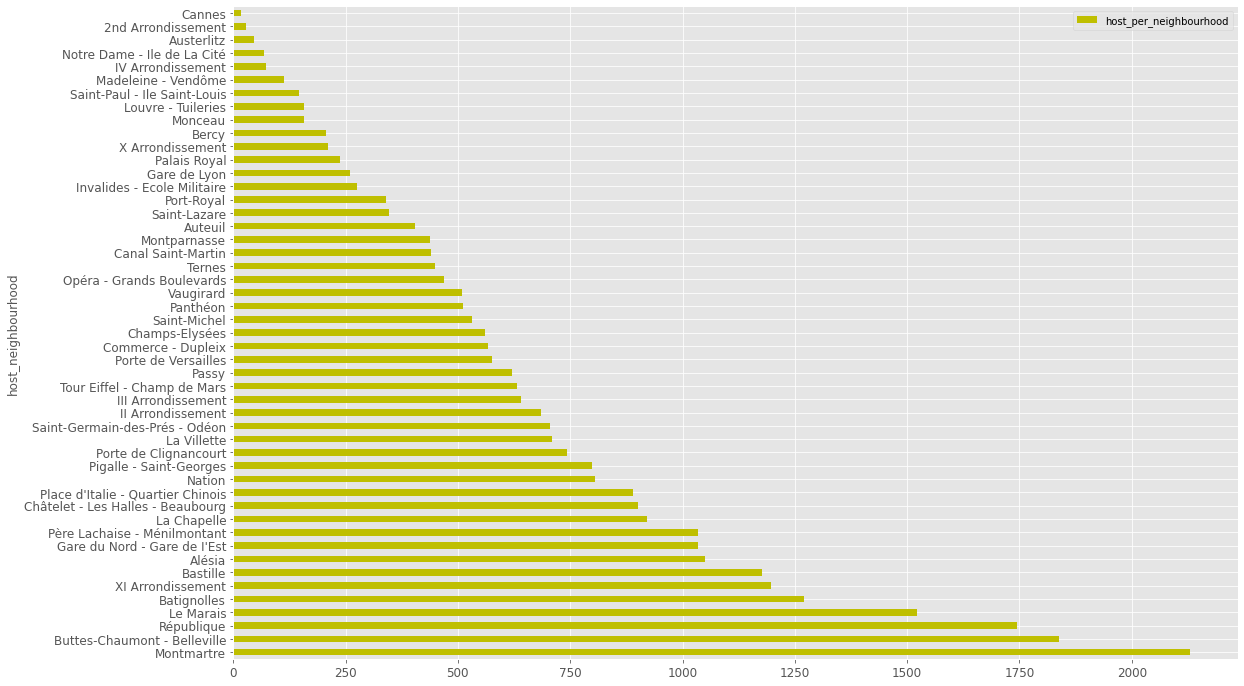

In [ ]:
plt.style.use('ggplot')
filtred_host_per_neighbourhood = host_per_neighbourhood[host_per_neighbourhood["host_per_neighbourhood"]>10]
filtred_host_per_neighbourhood.index.name = 'host_neighbourhood'
filtred_host_per_neighbourhood.plot.barh(figsize=(18,12), color = "y", fontsize=12)

In [ ]:
interested_neighbourhood = merged_airbnb_data[merged_airbnb_data["host_neighbourhood"].isin(filtred_host_per_neighbourhood.index.tolist())]
interested_neighbourhood = interested_neighbourhood[["host_neighbourhood","price"]]
grouped_interested_neighbourhood = interested_neighbourhood.groupby("host_neighbourhood").mean()
grouped_interested_neighbourhood.head()

price
host_neighbourhood            
2nd Arrondissement  130.613793
Alésia              103.033705
Austerlitz          103.068161
Auteuil             127.238399
Bastille            112.150922

In [ ]:
grouped_interested_neighbourhood.sort_values(by="host_neighbourhood")

price
host_neighbourhood                           
2nd Arrondissement                 130.613793
Alésia                             103.033705
Austerlitz                         103.068161
Auteuil                            127.238399
Bastille                           112.150922
Batignolles                         92.605389
Bercy                               82.838457
Buttes-Chaumont - Belleville        84.126680
Canal Saint-Martin                 106.597485
Cannes                             160.065753
Champs-Elysées                     394.508824
Châtelet - Les Halles - Beaubourg  171.024494
Commerce - Dupleix                 142.973441
Gare de Lyon                        86.029890
Gare du Nord - Gare de I'Est       116.158900
II Arrondissement                  151.523208
III Arrondissement                 348.641113
IV Arrondissement                  137.279342
Invalides - Ecole Militaire        186.351393
La Chapelle                         75.680801
La Villette                         75.379701
Le Marais                          172.500047
Louvre - Tuileries                 389.863175
Madeleine - Vendôme                172.996698
Monceau                            189.843322
Montmartre                         110.815187
Montparnasse                       139.836298
Nation                              82.022824
Notre Dame - Ile de La Cité        221.936337
Opéra - Grands Boulevards          146.539682
Palais Royal                       185.439189
Panthéon                           134.720304
Passy                              193.461511
Pigalle - Saint-Georges            119.972631
Place d'Italie - Quartier Chinois   90.851233
Port-Royal                         125.809827
Porte de Clignancourt               82.028685
Porte de Versailles                 98.582854
Père Lachaise - Ménilmontant        77.645485
République                         147.865297
Saint-Germain-des-Prés - Odéon     217.816313
Saint-Lazare                       194.236685
Saint-Michel                       148.802533
Saint-Paul - Ile Saint-Louis       171.813629
Ternes                             157.476015
Tour Eiffel - Champ de Mars        189.977239
Vaugirard                          104.520258
X Arrondissement                    91.189791
XI Arrondissement                   90.139401

In [ ]:
grouped_interested_neighbourhood.describe()

price
count   49.000000
mean   147.685557
std     71.940170
min     75.379701
25%     98.582854
50%    134.720304
75%    172.500047
max    394.508824

In [ ]:
merged_data_for_interested_neighbourhood = filtred_host_per_neighbourhood.merge(grouped_interested_neighbourhood,on="host_neighbourhood")
merged_data_for_interested_neighbourhood.head()


host_per_neighbourhood       price
host_neighbourhood                                              
Montmartre                                      2129  110.815187
Buttes-Chaumont - Belleville                    1839   84.126680
République                                      1744  147.865297
Le Marais                                       1521  172.500047
Batignolles                                     1271   92.605389

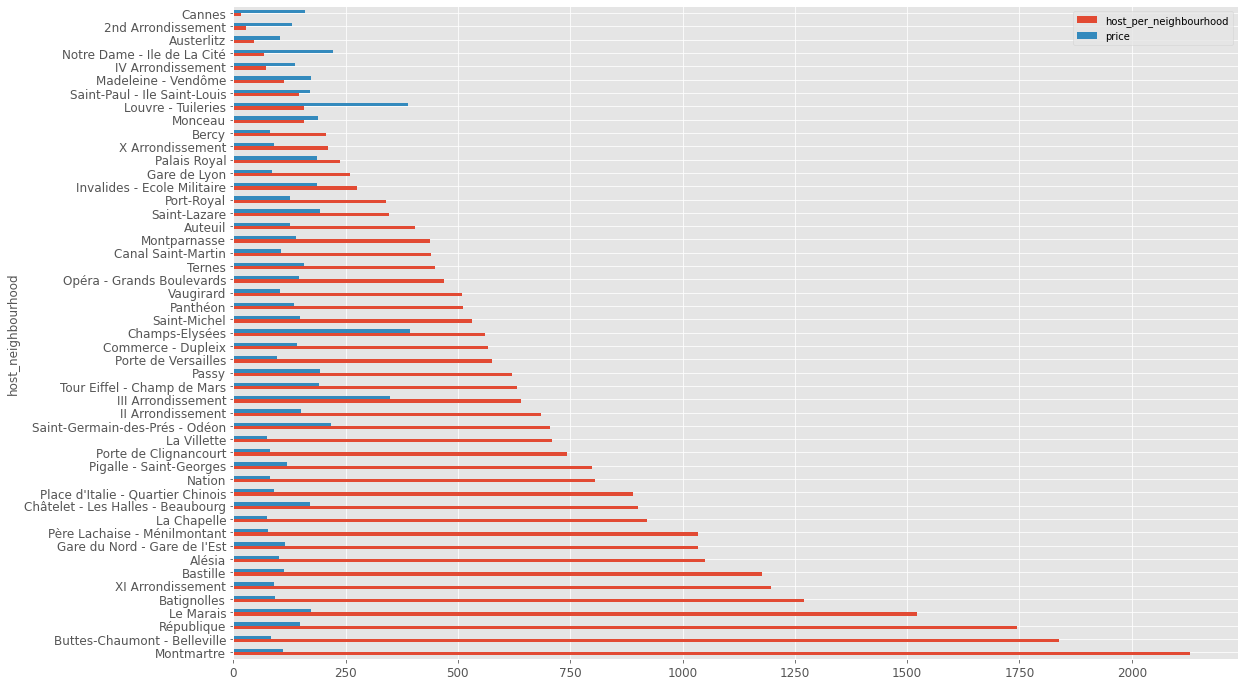

In [ ]:
plt.style.context('seaborn-dark')
merged_data_for_interested_neighbourhood.plot.barh(figsize=(18,12), fontsize=12)

In [ ]:
trend_beadrooms = merged_airbnb_data.bedrooms.value_counts().to_frame('trend_beadrooms')
trend_beadrooms.set_index("trend_beadrooms")
trend_beadrooms.head()

trend_beadrooms
1.0            22673
2.0             6085
3.0             1934
4.0              500
5.0               95

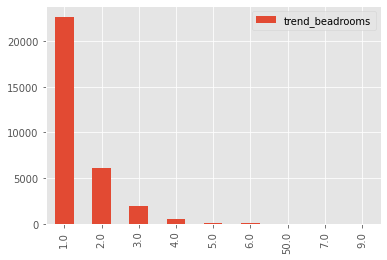

In [ ]:
trend_beadrooms.plot(kind="bar")

In [ ]:
full_grouped_and_merged_airbnb_data_on_host_neighbourhood = grouped_and_merged_airbnb_data_on_host_neighbourhood.merge(merged_data_for_interested_neighbourhood, on="host_neighbourhood")
full_grouped_and_merged_airbnb_data_on_host_neighbourhood["neighbourhood"] = full_grouped_and_merged_airbnb_data_on_host_neighbourhood.index.tolist()
full_grouped_and_merged_airbnb_data_on_host_neighbourhood.head()

bedrooms  longitude  ...     price_y       neighbourhood
host_neighbourhood                       ...                                
2nd Arrondissement       1.0   2.338163  ...  130.613793  2nd Arrondissement
Alésia                   1.0   2.326867  ...  103.033705              Alésia
Austerlitz               1.0   2.363332  ...  103.068161          Austerlitz
Auteuil                  1.0   2.269812  ...  127.238399             Auteuil
Bastille                 1.0   2.375777  ...  112.150922            Bastille

[5 rows x 7 columns]

In [ ]:
full_grouped_and_merged_airbnb_data_on_host_neighbourhood.apply(lambda row:folium.Marker(location=[row["latitude"], row["longitude"]],
                                              popup=folium.Popup(
                                              """
                                              <h4>
                                              Quartier: {}
                                              <br/>
                                              Nombre de location : {}
                                              <br/>
                                              Prix moyen par nuit : {}$
                                              <br/>
                                              Nb de chambre moyen : {} chambre(s).<br/>
                                              </h4>
                                              <h5>Check out more <a href="https://getbootstrap.com/docs/3.3/components/" target="_blank">here</a></h5>
                                              """.format(row["neighbourhood"],row["host_per_neighbourhood"],row["price_x"], row["bedrooms"]), max_width=300),
                                              icon=folium.Icon(color='green',icon='glyphicon glyphicon-home'))
                                             .add_to(map), axis=1)
map

In [ ]:
map_lite = folium.Map(location=[merged_airbnb_data.latitude.mean(), merged_airbnb_data.longitude.mean()], zoom_start=13, control_scale=True)
full_grouped_and_merged_airbnb_data_on_host_neighbourhood.apply(lambda row:folium.Marker(location=[row["latitude"], row["longitude"]],
                                              popup=folium.Popup(
                                              """
                                              <h4>
                                              Quartier: {}
                                              <br/>
                                              Nombre de location : {}
                                              <br/>
                                              Prix moyen: {}
                                              <br/>
                                              Nombre de chambre: {}.<br/>
                                              </h4>
                                              <h5>Check out more <a href="https://getbootstrap.com/docs/3.3/components/" target="_blank">here</a></h5>
                                              """.format(row["neighbourhood"],row["host_per_neighbourhood"],row["price_x"], row["bedrooms"]), max_width=300),
                                              icon=folium.Icon(color='green',icon='glyphicon glyphicon-home'))
                                             .add_to(map_lite), axis=1)
paris_airbnb_concentration = full_grouped_and_merged_airbnb_data_on_host_neighbourhood[['latitude', 'longitude']].to_numpy() 

# plot heatmap
map_lite.add_child(plugins.HeatMap(paris_airbnb_concentration, radius=15))
map_lite

In [ ]:
valeurs_fonciere_2020_data = pd.read_csv(valeurs_fonciere_2020,sep="|")
valeurs_fonciere_2020_data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (18,23,24,26,28,31,33,41) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Code service CH  Reference document  ...  Nature culture speciale  Surface terrain
0              NaN                 NaN  ...                      NaN           1061.0
1              NaN                 NaN  ...                      NaN             85.0
2              NaN                 NaN  ...                      NaN           1115.0
3              NaN                 NaN  ...                      NaN           1940.0
4              NaN                 NaN  ...                      NaN           1148.0

[5 rows x 43 columns]

In [ ]:
valeurs_fonciere_2020_paris =valeurs_fonciere_2020_data[valeurs_fonciere_2020_data["Code departement"] == 75]
valeurs_fonciere_2020_paris =valeurs_fonciere_2020_paris[valeurs_fonciere_2020_paris["Type local"] == "Appartement"]
valeurs_fonciere_2020_paris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34597 entries, 3094986 to 3149481
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Code service CH             0 non-null      float64
 1   Reference document          0 non-null      float64
 2   1 Articles CGI              0 non-null      float64
 3   2 Articles CGI              0 non-null      float64
 4   3 Articles CGI              0 non-null      float64
 5   4 Articles CGI              0 non-null      float64
 6   5 Articles CGI              0 non-null      float64
 7   No disposition              34597 non-null  int64  
 8   Date mutation               34597 non-null  object 
 9   Nature mutation             34597 non-null  object 
 10  Valeur fonciere             34565 non-null  object 
 11  No voie                     34597 non-null  float64
 12  B/T/Q                       1420 non-null   object 
 13  Type de voie           

In [ ]:
valeurs_fonciere_2020_paris.describe()

Code service CH  ...  Surface terrain
count              0.0  ...      2775.000000
mean               NaN  ...       393.658378
std                NaN  ...       326.933164
min                NaN  ...        29.000000
25%                NaN  ...       193.000000
50%                NaN  ...       310.000000
75%                NaN  ...       503.000000
max                NaN  ...      2032.000000

[8 rows x 21 columns]

In [ ]:
valeurs_appartements_2020_paris =valeurs_fonciere_2020_paris[["No voie","Type de voie","Voie","Code postal",\
                                                         "Valeur fonciere","Surface Carrez du 1er lot",\
                                                         "Surface reelle bati","Nombre pieces principales"]]

valeurs_appartements_2020_paris["No voie"] = valeurs_appartements_2020_paris["No voie"].astype(int)
valeurs_appartements_2020_paris["Code postal"] = valeurs_appartements_2020_paris["Code postal"].astype(int)
valeurs_appartements_2020_paris["Adress"] = valeurs_appartements_2020_paris["No voie"].astype(str) + " " +\
                                             valeurs_appartements_2020_paris["Type de voie"].astype(str) + " " + \
                                             valeurs_appartements_2020_paris["Voie"].astype(str) + " " +\
                                             valeurs_appartements_2020_paris["Code postal"].astype(str)


valeurs_appartements_2020_paris.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

No voie  ...                        Adress
3094986       14  ...      14 RUE DE L ARCADE 75008
3094987        9  ...    9 BD DE LA MADELEINE 75001
3094989       10  ...  10 RUE DU BOURG L ABBE 75003
3094990       24  ...     24 RUE DE SAINTONGE 75003
3094991       24  ...     24 RUE DE SAINTONGE 75003

[5 rows x 9 columns]

In [ ]:
valeurs_appartements_2020_paris.to_csv(Racine_Data + "valeurs_appartements_2020_paris.csv")

In [ ]:
valeurs_appartements_2020_paris = pd.read_csv(Racine_Data + "valeurs_appartements_2020_paris.csv")

In [ ]:
valeurs_appartements_2020_paris.head()

Unnamed: 0  No voie  ... Nombre pieces principales                        Adress
0     3094986       14  ...                       1.0      14 RUE DE L ARCADE 75008
1     3094987        9  ...                       2.0    9 BD DE LA MADELEINE 75001
2     3094989       10  ...                       2.0  10 RUE DU BOURG L ABBE 75003
3     3094990       24  ...                       1.0     24 RUE DE SAINTONGE 75003
4     3094991       24  ...                       1.0     24 RUE DE SAINTONGE 75003

[5 rows x 10 columns]

In [ ]:
import requests
import urllib.parse
import time
address = '14 RUE DE L ARCADE 75008'
url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) +'?format=json'

response = requests.get(url).json()
print(response[0]["lat"])
print(response[0]["lon"])

48.8716516
2.323688


In [ ]:
from geopy.geocoders import Nominatim



In [ ]:
valeurs_appartements_2020_paris.isna().sum()  

Unnamed: 0                       0
No voie                          0
Type de voie                    28
Voie                             0
Code postal                      0
Valeur fonciere                 32
Surface Carrez du 1er lot    16136
Surface reelle bati              0
Nombre pieces principales        0
Adress                           0
dtype: int64

Unnamed: 0  No voie  ... Nombre pieces principales                        Adress
1     3094987        9  ...                       2.0    9 BD DE LA MADELEINE 75001
2     3094989       10  ...                       2.0  10 RUE DU BOURG L ABBE 75003
3     3094990       24  ...                       1.0     24 RUE DE SAINTONGE 75003
5     3094992       24  ...                       1.0     24 RUE DE SAINTONGE 75003
8     3094995       83  ...                       8.0       83 RUE DE MONCEAU 75008

[5 rows x 10 columns]

In [ ]:
  longitude = []
  latitude = []
  counter = 0
  for address in valeurs_appartements_2020_paris['Adress']:

    url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) +'?format=json'
    response = requests.get(url).json()
    
    try:
      lat = response[0]["lat"]
      lon = response[0]["lon"]
    except:
      lat = 48.8716516
      lon = 2.323688
      print("Err")

    print(lat)
    print(lon)
  
    longitude.append(lon)
    latitude.append(lat)
    counter += 1
    if counter > 20:
      break


48.8716516
2.323688
48.8695601
2.3269615
48.8640622
2.3518886
48.862128
2.362973
48.862128
2.362973
48.862128
2.362973
Err
48.8716516
2.323688
48.8800026
2.3152859
48.8800026
2.3152859
48.863219650000005
2.3598871107292316
48.8579933
2.3472109
48.8616292
2.3575925
48.864575
2.3551262
48.8790859
2.3172843
48.8775951
2.2993929
48.8766673
2.3216206
48.8639766
2.3659519
48.8653507
2.3566045
48.8611254
2.3604622
48.8606017
2.3616088
48.8674734
2.3577982


In [ ]:
test = pd.DataFrame({'latitude':  latitude,'longitude': longitude})

print(test)

              latitude           longitude
0           48.8716516            2.323688
1           48.8695601           2.3269615
2           48.8640622           2.3518886
3            48.862128            2.362973
4            48.862128            2.362973
5            48.862128            2.362973
6              48.8717             2.32369
7           48.8800026           2.3152859
8           48.8800026           2.3152859
9   48.863219650000005  2.3598871107292316
10          48.8579933           2.3472109
11          48.8616292           2.3575925
12           48.864575           2.3551262
13          48.8790859           2.3172843
14          48.8775951           2.2993929
15          48.8766673           2.3216206
16          48.8639766           2.3659519
17          48.8653507           2.3566045
18          48.8611254           2.3604622
19          48.8606017           2.3616088
20          48.8674734           2.3577982


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   latitude   21 non-null     object
 1   longitude  21 non-null     object
dtypes: object(2)
memory usage: 464.0+ bytes


In [ ]:
test = test.latitude.astype(float)
test = test.latitude.astype(float)
map = folium.Map(location=[test.latitude.astype(float).mean(), test.longitude.astype(float).mean()], zoom_start=13, control_scale=True)

test_heat_map = test[['latitude', 'longitude']].to_numpy() 

# plot heatmap
map.add_children(plugins.HeatMap(test_heat_map, radius=16))
map


RecursionError: ignored